## Which Neighborhoods have the most access to bus stops?

### *By Devin Gilson*

Dataset: https://data.wprdc.org/dataset/prt-of-allegheny-county-transit-stops

As a fellow college student, who is broke, our access to free and somewhat reliable transportation is an important factor for our housing. The purpose of this section is to compile a map that serves as some sort of frequency map. That allows the user to quicly cross reference potential housing with the number of nearby stops.


Here I import my dependcies for my section:

In [23]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import contextily as cx
import shapely
import descartes
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

This is where I summon the relevant files:
- The first command is for manipulation
- The second is there to output my dataframe

In [34]:
df = pd.read_csv("busstopusagebyroute.csv")
stops = gpd.read_file('busstopusagebyroute.csv')
crs = {'init':'epsg:4326'}

Below is the csv file I will be using today that contains Pittsburgh's bus data:

In [33]:
df.head()

,STOP_ID,ROUTE,STOP_ROUTE,STOP_NAME,CLEVER_ID,LATITUDE,LONGITUDE,ALL_ROUTES,SHELTER,STOP_TYPE,...,1806_ON,1806_OFF,1809_ON,1809_OFF,1811_ON,1811_OFF,1903_ON,1903_OFF,1906_ON,1906_OFF
0,P03090,P1,P03090_P1,SMITHFIELD ST AT SIXTH AVE,7280.0,40.441550,-79.997761,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,3338.2,1706.2,3534.3,1800.3,3117.1,1541.7,3434.1,1809.6,3615.6,1829.3
1,P02325,P1,P02325_P1,LIBERTY AVE AT 10TH ST,7279.0,40.443739,-79.995153,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,893.6,2300.3,994.7,2429.7,882.7,2234.2,892.4,2269.3,719.5,2050.9
2,P03360,38,P03360_38,STANWIX ST AT FORBES AVE,44.0,40.440989,-80.003966,"36, 38",No Shelter,Bus,...,1313.4,904.9,1287.7,880.8,1235.1,764.1,1218.2,805.9,1169.9,783.6
3,P00930,16,P00930_16,7TH ST AT PENN AVE,20182.0,40.443298,-80.000402,"13, 16, 17",No Shelter,Bus,...,765.6,1158.2,779.1,1222.1,714.9,1105.7,718.7,1133.2,680.3,1081.8
4,P02550,91,P02550_91,LIBERTY AVE AT WOOD ST,46.0,40.442401,-79.999575,"28X, 77, 86, 88, 91",No Shelter,Bus,...,1313.9,451.5,1398.9,462.8,1306.7,433.3,1288.4,419.4,1243.1,389.5


In this section, I focus on the longitude and latitude portion of the csv file as this grants the location of bus stops:

In [35]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'],df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry = geometry)

Below, I set up the paramaters for my bare data points that will be placed onto a map using:

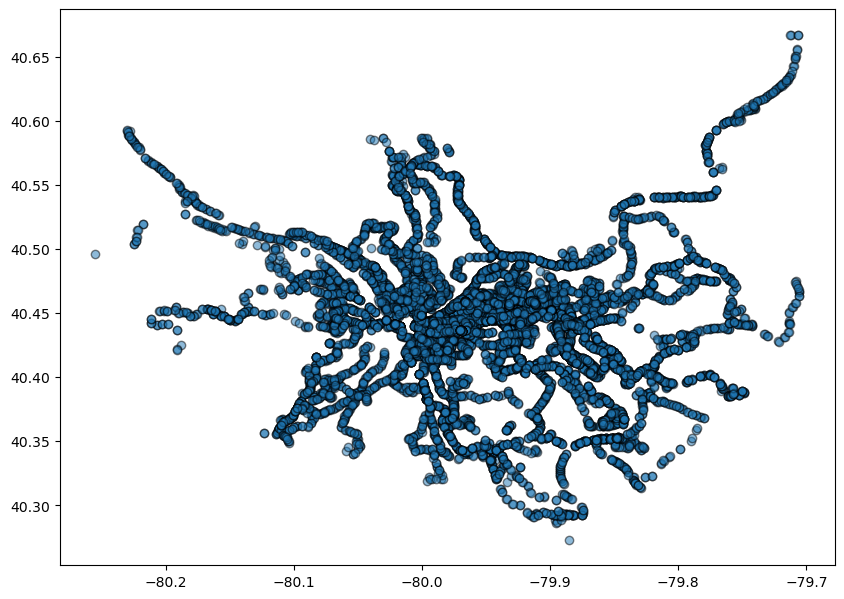

In [36]:

x = gdf.plot(figsize=(10,10), alpha =.5, edgecolor = 'k')

### The Creation of The Map
This is where I set up the map using geo pandas and other libraries.

Here I pull in the street mpa file. And out put it:

<AxesSubplot:>

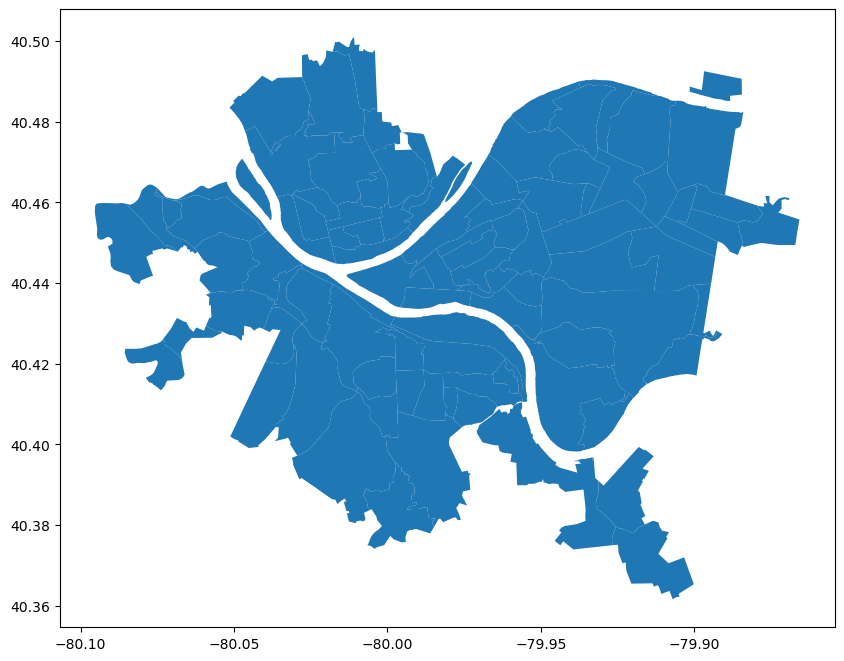

In [87]:
street_map = gpd.read_file('kx-pittsburgh-pa-neighborhoods-SHP/pittsburgh-pa-neighborhoods.shp')

fig, bx = plt.subplots(figsize=(10,10))
street_map.plot(ax=bx)

Here I set up the data fram and I translate the incoming map data fronm the shapefile. That way I can align it to the longitude and latitude that i will use later on.

In [83]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry) 

/Users/devin/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Here is the updated data frame but this time it contains the point coordinates for the map in the further right column:

In [84]:
df = pd.read_csv("busstopusagebyroute.csv")
crs = {'init':'epsg:4326'}
df.head()

,STOP_ID,ROUTE,STOP_ROUTE,STOP_NAME,CLEVER_ID,LATITUDE,LONGITUDE,ALL_ROUTES,SHELTER,STOP_TYPE,...,1806_ON,1806_OFF,1809_ON,1809_OFF,1811_ON,1811_OFF,1903_ON,1903_OFF,1906_ON,1906_OFF
0,P03090,P1,P03090_P1,SMITHFIELD ST AT SIXTH AVE,7280.0,40.441550,-79.997761,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,3338.2,1706.2,3534.3,1800.3,3117.1,1541.7,3434.1,1809.6,3615.6,1829.3
1,P02325,P1,P02325_P1,LIBERTY AVE AT 10TH ST,7279.0,40.443739,-79.995153,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,893.6,2300.3,994.7,2429.7,882.7,2234.2,892.4,2269.3,719.5,2050.9
2,P03360,38,P03360_38,STANWIX ST AT FORBES AVE,44.0,40.440989,-80.003966,"36, 38",No Shelter,Bus,...,1313.4,904.9,1287.7,880.8,1235.1,764.1,1218.2,805.9,1169.9,783.6
3,P00930,16,P00930_16,7TH ST AT PENN AVE,20182.0,40.443298,-80.000402,"13, 16, 17",No Shelter,Bus,...,765.6,1158.2,779.1,1222.1,714.9,1105.7,718.7,1133.2,680.3,1081.8
4,P02550,91,P02550_91,LIBERTY AVE AT WOOD ST,46.0,40.442401,-79.999575,"28X, 77, 86, 88, 91",No Shelter,Bus,...,1313.9,451.5,1398.9,462.8,1306.7,433.3,1288.4,419.4,1243.1,389.5


In the cell below, I finally convert the longitude and latitude into properly graphable points:

In [85]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

/Users/devin/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Then to end things here is the code that properly outputs the map:

/Users/devin/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


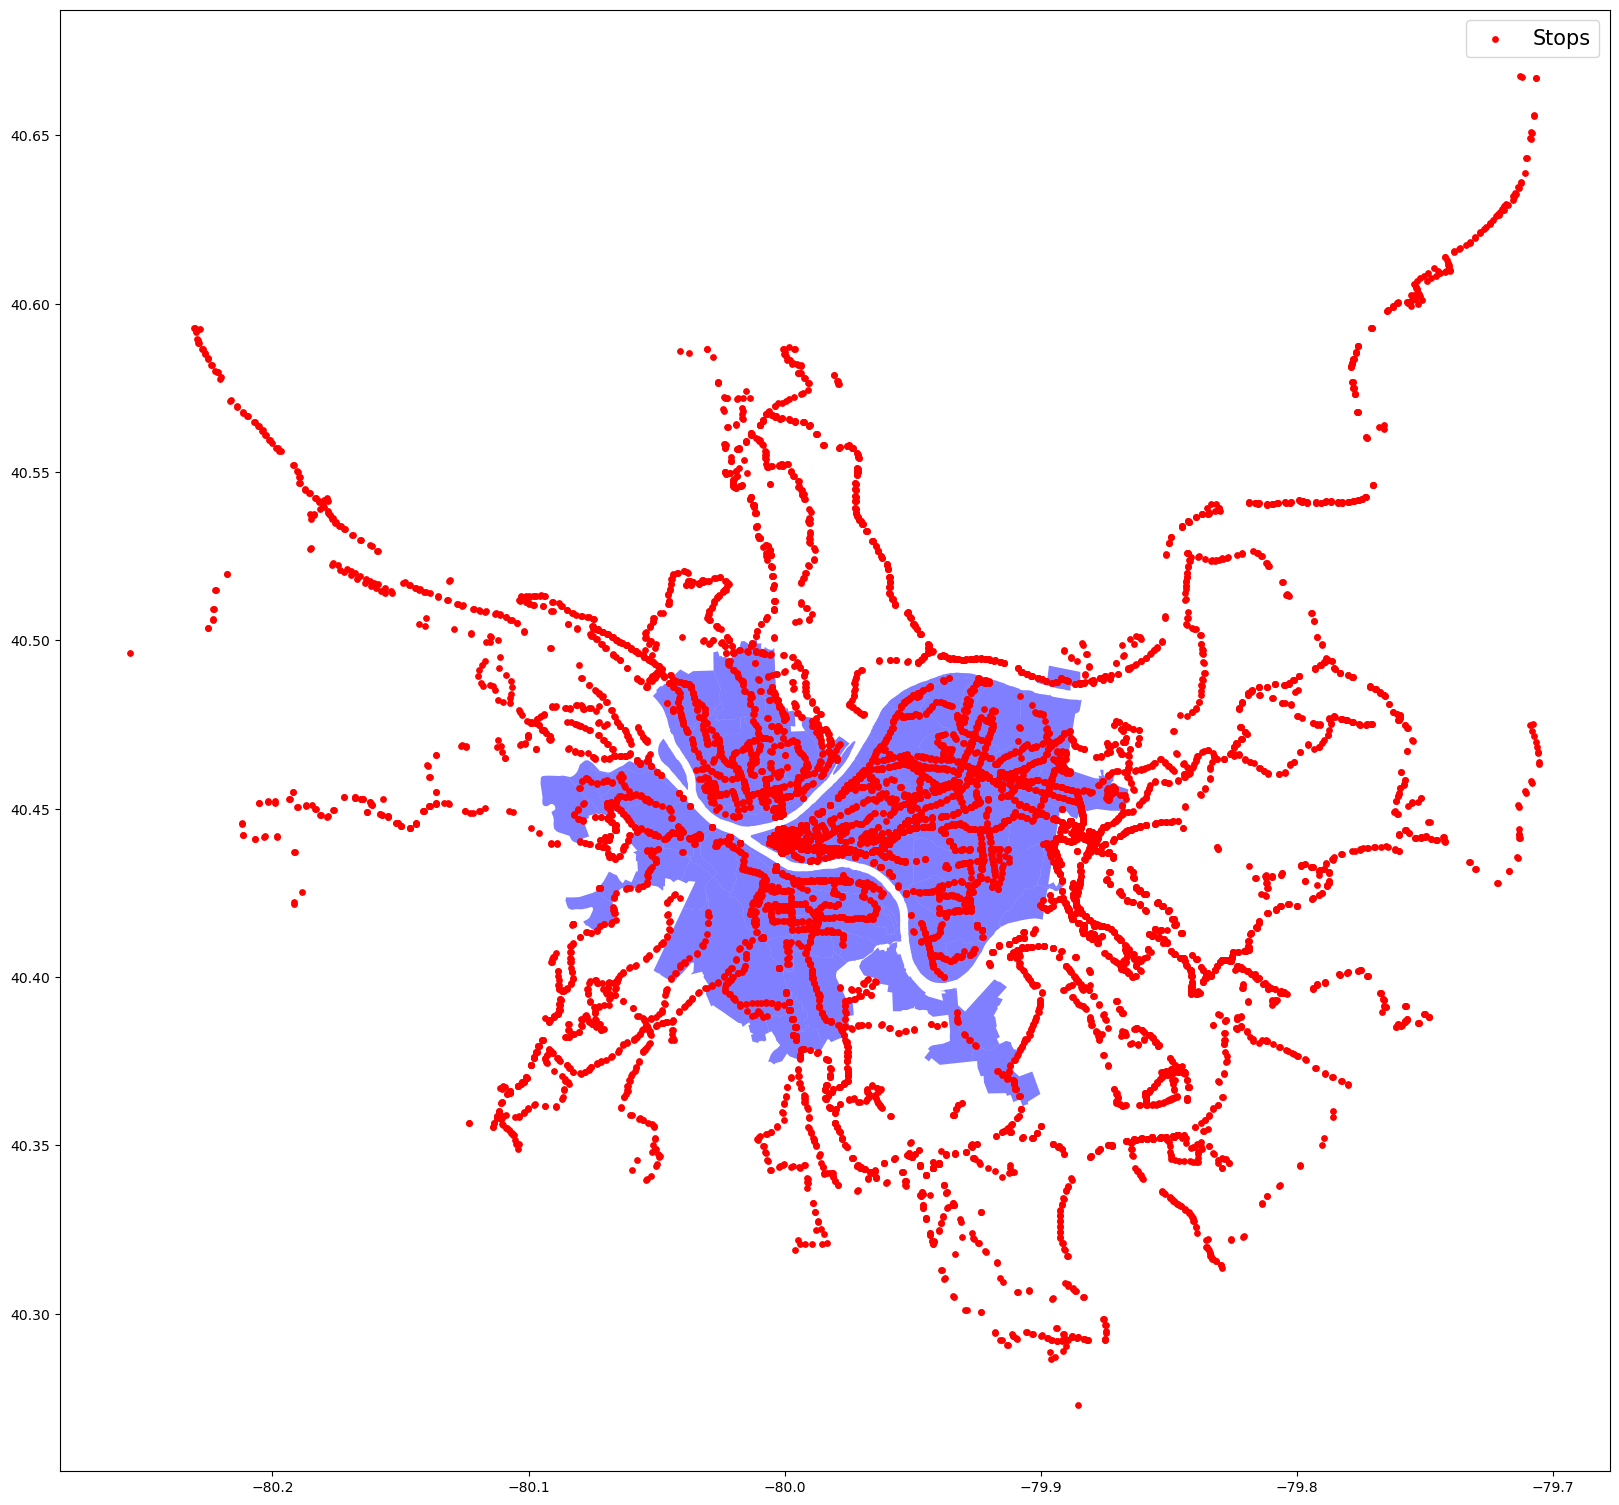

In [92]:
fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=.5, color='blue')
geo_df.plot(column = 'STOP_ID' ,ax=ax, 
                                       markersize=15, 
                                       color='red', 
                                       marker='o', 
                                       label='Stops')

plt.legend(prop={'size':15})

If you look at that map you can tell where the most number of stops lies and that's where I based my conclusion.

# In Conclusion,

In terms of best neighborhood for transportation its going to be those that are closest to the Lat: 40.441 and lon: -79.996 or the DownTown District. Which suggests that students who value transportation in Pittsburgh, should seek apartment stile housing near the Steel plaza